  <header>
    <h1>K-Nearest Neighbor’s sensitivity to noise comparing with otheralgorithms</h1>
    <h3>Implementation of statistical stignificance test</h3>
    <p><strong>Authors: </strong>Voulgari Eleni, Mylonaki Aggeliki, Konstantopoulou Vasiliki and Karydis Athanasios</p>
  </header>
  <br>
  <br>
  <p> Importing ELA metrics (loss of accuracy), in noise-oriented dictionaries

In [47]:
import glob, os
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import math
import csv


oldPath=os.getcwd()
homePath=oldPath+"/ELAResults"
os.chdir(homePath)

df = DataFrame()

files=glob.glob("10/*")
dict10={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict10[f]=df

files=glob.glob("20/*")
dict20={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict20[f]=df


files=glob.glob("33/*")
dict33={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict33[f]=df
   
os.chdir(oldPath)

<strong>
<br>
<br>Implementing Normality test</strong>
<br> Normality tests are needed so as to understand if a parametric or non-parametric statistical test should be chosen

In [48]:
normal=0
not_normal=0

for dictionary in dict0,dict20,dict20,dict33:
    for key, entry in dictionary.items():
        #descriptive statistics
        #print r[0]
        #print r[1].describe(),"\n"
        value, p = normaltest(entry)

        if p >= 0.05:
            normal+=1
        else:
            not_normal+=1

print "Total files=", len(dict0) + len(dict10) + len(dict20)+ len(dict33),"\n\n"
print "Samples likely originating from normal distribution:", normal
print "Samples NOT likely originating from normal distribution:", not_normal

/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest on

Total files= 204 


Samples likely originating from normal distribution: 182
Samples NOT likely originating from normal distribution: 22


/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/gelou/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest on

<strong><br>
<br>
Plotting our data</strong>
<br>
NOTE: Remove comment to see descriptive statistics.

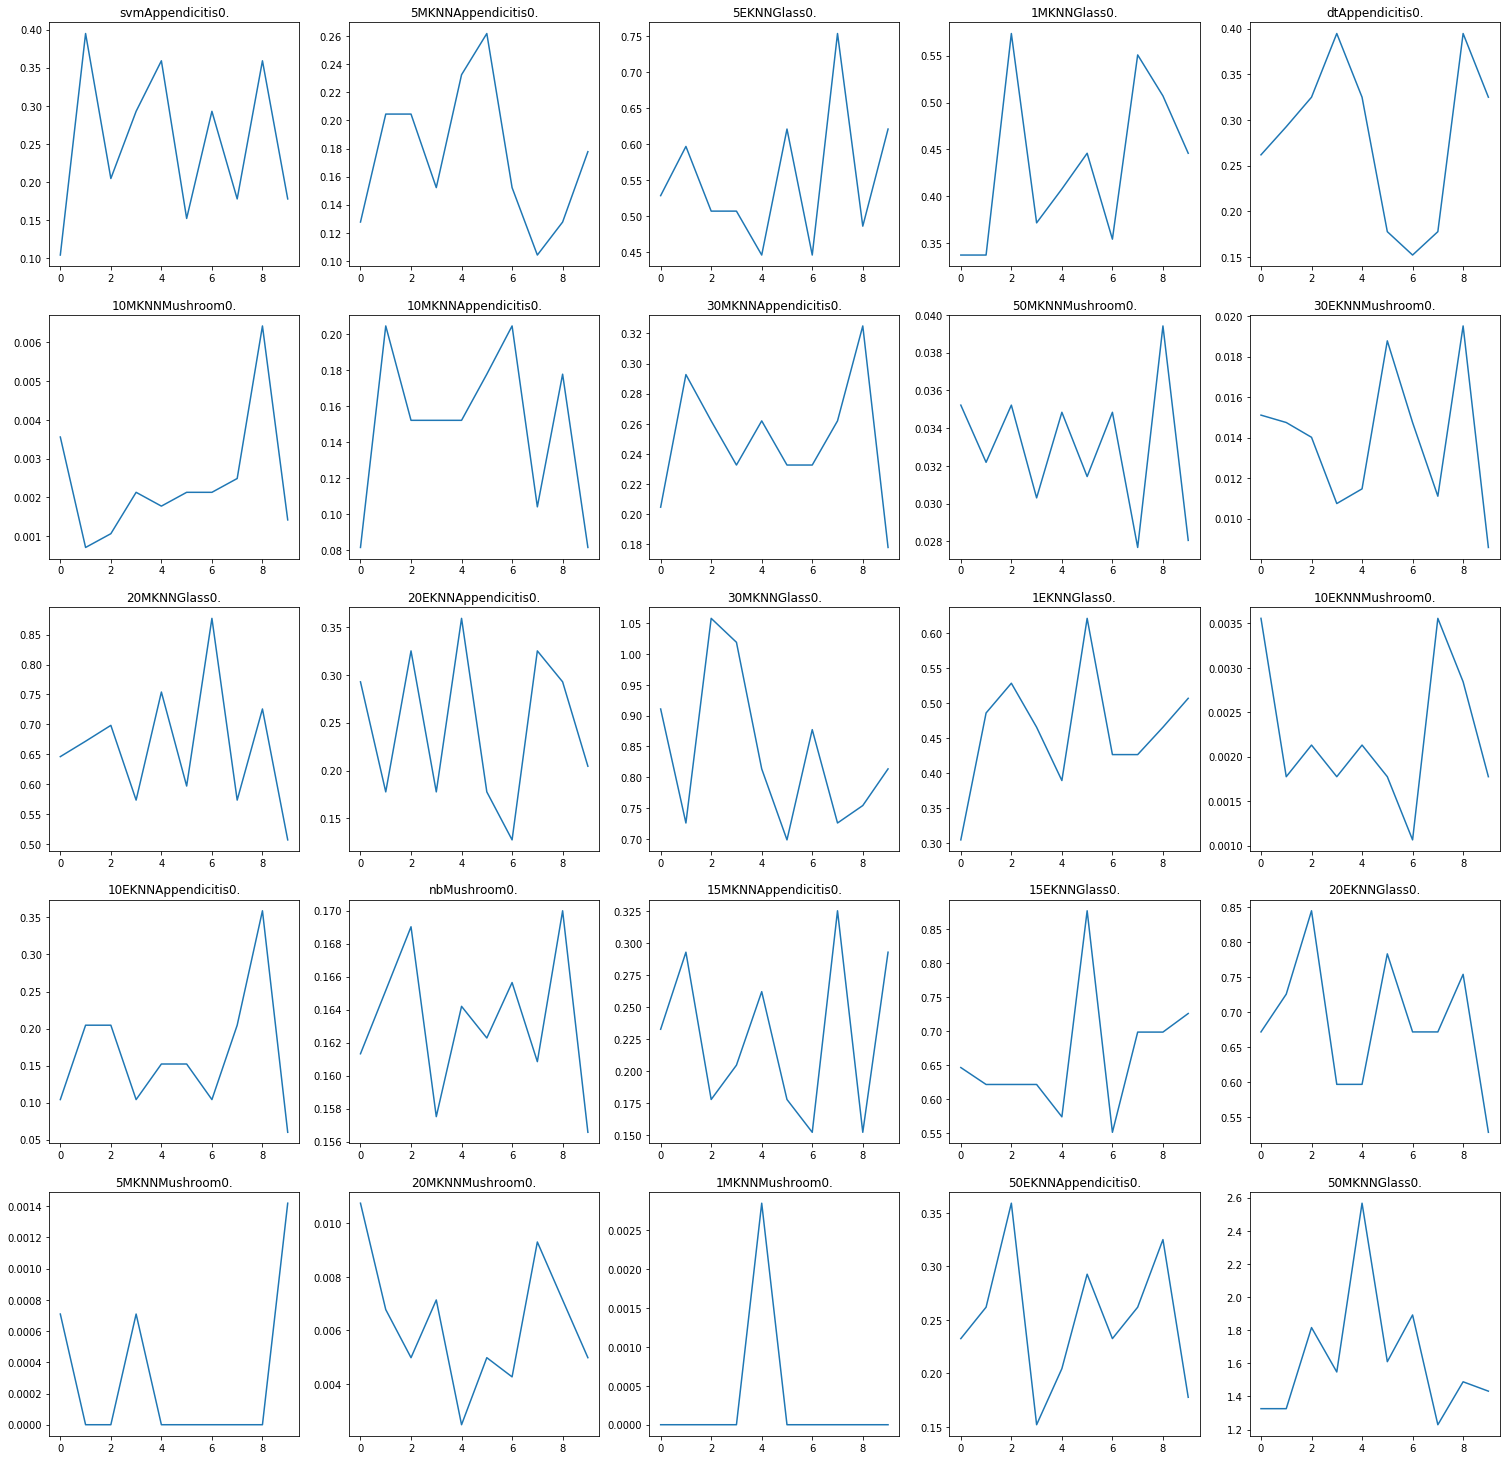

In [49]:
fig, ax = plt.subplots(5, 5,figsize=(26, 26))
column=0
row=0

for dictionary in dict0,dict20,dict20,dict33:
    for key, entry in dictionary.items():

        if row == 5:
            break;
          
        elements=entry.values.flatten().tolist()
        #print entry.describe()
        ax[row, column].plot(elements)
        ax[row, column].set_title(key[2:-3])
        
        if column==4:
            row+=1
            column=0
        else:
            column+=1
        
plt.show()        

<strong><br>
<br>Comparison of the accuracy loss:</strong>
<br>
<br> We are using Kolmogorov-Smirnov statistical test, which is a non parametric test, since not all our data samples are generated from a normal distribution.
<br>
<br>It is important to note though, that since most of our data are indeed generated from a normal distribution (or at least we cannot prove the opposite), then Kolmogorov-Smirnov test might have less statistical power.
<br>
<br> For each noise level, we compare knn, using various configurations for K (number of neighbors), with Decision Trees, Naive Bayes and Support Vector Machines
<br>Below we compare each algorithm against KNN and store the results to a csv file
<br>
<br>Cohen coefficient is also used to measure the effectiveness of the difference between the samples. Only comparisons with absolute effectiveness larger than 0.5 are collected for further analysis.

In [50]:
noise_level=["10","20","33"]
noise_level_index=0

acceptances=0
rejects=0

def cohen_d(lists):

    std_array = []
    mean_array = []
    
    for i in lists:
        array = np.array(i)
        std_array.append(np.std(array))
        mean_array.append(np.mean(array))

    s_pooled = math.sqrt(float(pow(std_array[0], 2) + pow(std_array[1], 2))/2)
    length = len(lists[0])

    return ((float(mean_array[0] - mean_array[1])) / s_pooled) *\
    (float(length - 3)/(length - 2.25)) * (math.sqrt(float(length-2)/length))


for dictionary in dict10,dict20,dict33: #for noise_level 10% ,20% ,33%
    
    res_file_name="allAlgorithms"+noise_level[noise_level_index]+".csv"
    with open(res_file_name, 'wb') as outcsv:
        writer = csv.writer(outcsv)
        writer.writerow(["model1", "model2", "p value", "cohen value"])
        
        for dataset in ["Mushroom", "Glass","Appendicitis"]:
            for knn_neighbor_num in ["1","5","10","15","20","30","50"]:
                for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                    models=[]

                    knn= noise_level[noise_level_index]+"/"+knn_neighbor_num + distance_type+ "KNN"\
                        +dataset+noise_level[noise_level_index]+".csv"

                    models.append(dictionary[knn].values.flatten().tolist())

                    for model in ["dt","nb","svm"]:

                        otherModel= noise_level[noise_level_index]+"/"+\
                            model+dataset+noise_level[noise_level_index]+".csv"
                        models.append(dictionary[otherModel].values.flatten().tolist())

                        #print "\n\nComparing: ", knnResults," - ",otherModelResults
                        #paired-T test
                        #stat, p = stats.ttest_rel(*models)

                        #Kolmogorov-Smirnov
                        stat, p = stats.ks_2samp(*models)               

                        #Wilcoxon
                        #stat, p = stats.wilcoxon(*models)

                        if p > 0.05:
                            acceptances+=1
                        else:
                            rejects+=1 
                            d=cohen_d(models)
                            if(abs(d)>=0.5):
                                writer.writerow([knn[3:-4], otherModel[3:-4],p,d])

                        models=models[:-1]

        noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances


Rejects:  194
Acceptances:  184


<strong><br>
<br>Comparing the effect of K in accuracy loss:</strong>
<br>
<br> We are still using Kolmogorov-Smirnov statistical test, as mentioned above.
<br>
<br> For each noise level, we study how KNN models, with different number of neighbors, are affected in each noise level.
<br>Below we compare versions of KNN against its other.
<br>
<br>Same as above, Cohen coefficient is used to measure the effectiveness of the difference between the samples. Only comparisons with absolute effectiveness larger than 0.5 are collected for further analysis.

In [51]:
noise_level_index=0

neighbor_num=["1","5","10","15","20","30","50"]
acceptances=0
rejects=0

for dictionary in dict10,dict20,dict33: #for noise_level 10% ,20% ,33%
    
    res_file_name="knnOnly"+noise_level[noise_level_index]+".csv"
    with open(res_file_name, 'wb') as outcsv:
        writer = csv.writer(outcsv)
        writer.writerow(["model1", "model2", "p value", "cohen value"])
    
        for dataset in ["Mushroom", "Glass","Appendicitis"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                for i in range(len(neighbor_num)):
                    models=[]
                    
                    knn1=noise_level[noise_level_index]+"/"+neighbor_num[i] + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                    models.append(dictionary[knn1].values.flatten().tolist())
                    
                    for j in range(i+1,len(neighbor_num)):
                        knn2=noise_level[noise_level_index]+"/"+neighbor_num[j] + distance_type+ "KNN"\
                        +dataset+noise_level[noise_level_index]+".csv"
             
                        models.append(dictionary[knn2].values.flatten().tolist())
                        #print "\n\nComparing: "+knn1+" "+knn2
                        #paired-T test
                        stat, p = stats.ttest_rel(*models)


                        if p > 0.05:
                            acceptances+=1
                        else:
                            rejects+=1
                            d=cohen_d(models)
                            if(abs(d)>=0.5):
                                writer.writerow([knn1[3:-4], knn2[3:-4],p,d])

                        models=models[:-1]
                    
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances

Rejects:  204
Acceptances:  174
